In [2]:
import pandas as pd
import yfinance as yf
import datetime
from datetime import date, timedelta
today = date.today()

d1 = today.strftime("%Y-%m-%d")
end_date = d1
d2 = date.today() - timedelta(days=365)
d2 = d2.strftime("%Y-%m-%d")
start_date = d2

df = yf.download('GOOG', 
                      start=start_date, 
                      end=end_date, 
                      progress=False)
df["Date"] = df.index
df = df[["Date", "Open", "High", "Low", "Close", "Adj Close", "Volume"]]
df.reset_index(drop=True, inplace=True)
print(df.head(15))

         Date        Open        High         Low       Close   Adj Close  \
0  2022-03-28  140.684494  141.976501  139.828156  141.949997  141.949997   
1  2022-03-29  143.160507  144.162506  142.483994  143.250000  143.250000   
2  2022-03-30  142.869995  143.480499  142.167999  142.644501  142.644501   
3  2022-03-31  142.448502  142.644501  139.619003  139.649506  139.649506   
4  2022-04-01  140.009995  140.949997  138.796997  140.699997  140.699997   
5  2022-04-04  140.824493  144.043747  140.824493  143.642502  143.642502   
6  2022-04-05  143.399506  143.589996  140.943497  141.063004  141.063004   
7  2022-04-06  139.161499  139.848495  136.418106  137.175995  137.175995   
8  2022-04-07  136.617996  137.701508  134.857254  136.464996  136.464996   
9  2022-04-08  136.250000  136.250000  133.752502  134.010498  134.010498   
10 2022-04-11  132.899994  132.939194  129.617493  129.796494  129.796494   
11 2022-04-12  132.423492  132.423492  127.575996  128.374496  128.374496   

In [4]:
df=df[['Close','Date']]
df.head()

,Close,Date
0,141.949997,2022-03-28
1,143.250000,2022-03-29
2,142.644501,2022-03-30
3,139.649506,2022-03-31
4,140.699997,2022-04-01


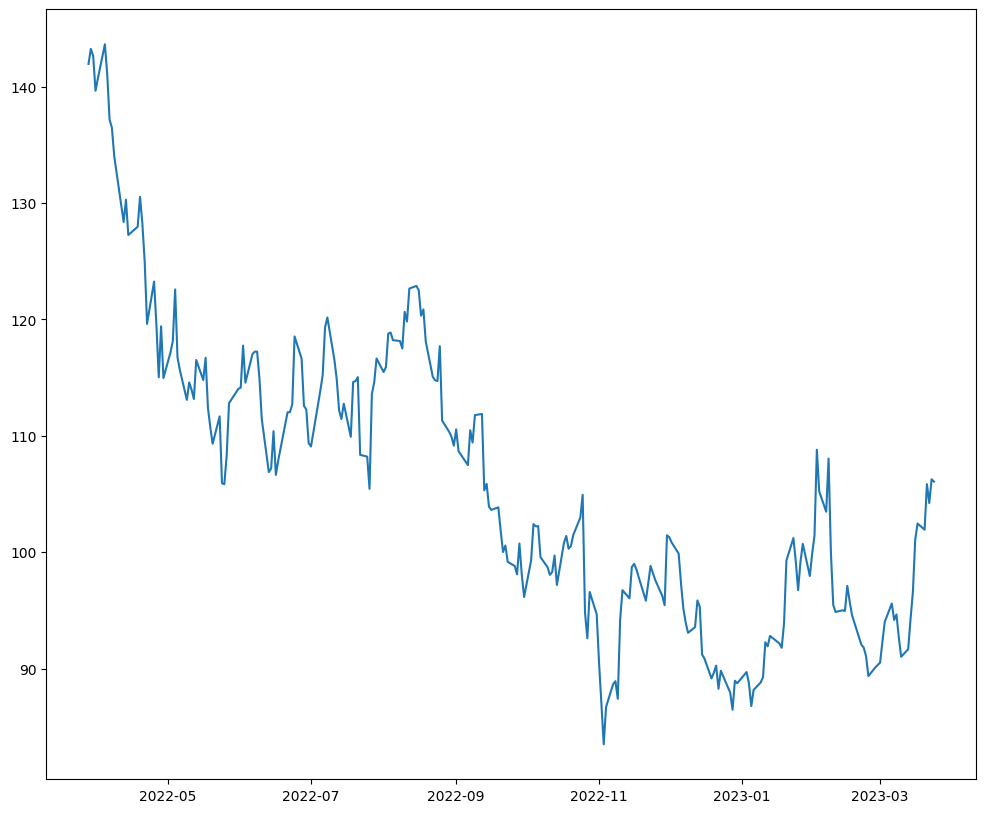

In [5]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 10))
plt.plot(df["Date"], df["Close"])

<Figure size 640x480 with 0 Axes>

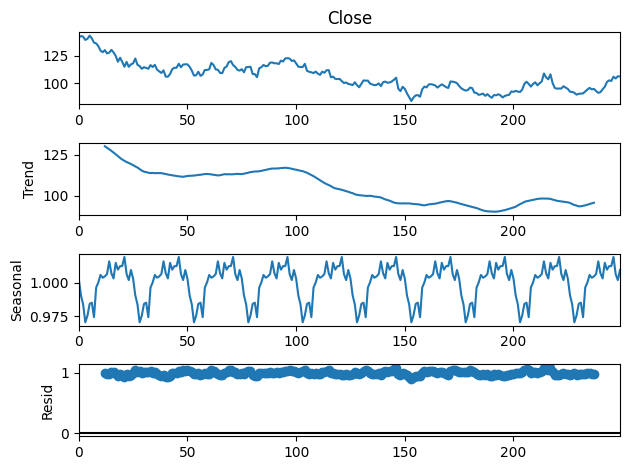

In [13]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df["Close"], 
                            model='multiplicative',period=25)
fig = plt.figure()  
fig = result.plot()  

In [8]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Python39\python.exe -m pip install --upgrade pip' command.


<AxesSubplot: xlabel='Lag', ylabel='Autocorrelation'>

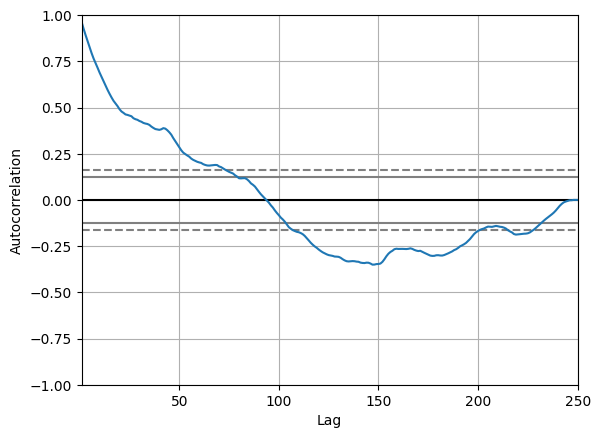

In [14]:
pd.plotting.autocorrelation_plot(df["Close"])

C:\Python39\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


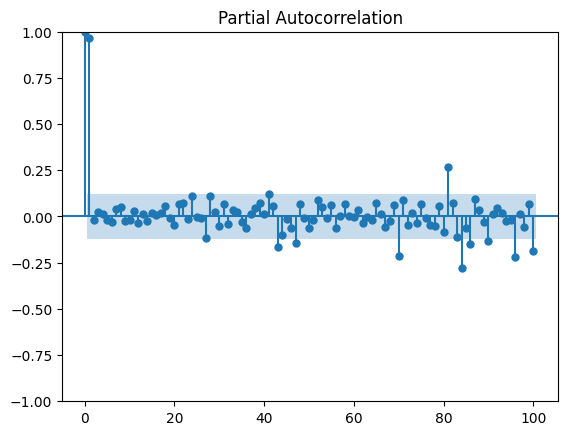

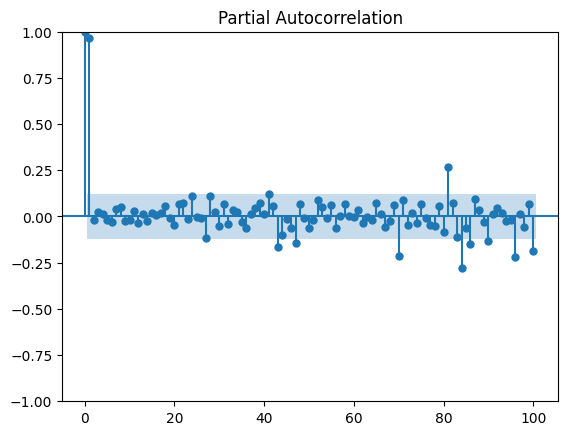

In [16]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(df["Close"], lags = 100)

In [20]:
p, d, q = 5, 1, 2
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(df["Close"], order=(p,d,q))  
fitted = model.fit()  
print(fitted.summary())

C:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  250
Model:                 ARIMA(5, 1, 2)   Log Likelihood                -592.268
Date:                Sun, 26 Mar 2023   AIC                           1200.535
Time:                        20:18:12   BIC                           1228.675
Sample:                             0   HQIC                          1211.862
                                - 250                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.4046      0.070     19.941      0.000       1.267       1.543
ar.L2         -0.9552      0.114     -8.359      0.000      -1.179      -0.731
ar.L3          0.0446      0.130      0.344      0.7

C:\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [21]:
#pred = fitted.predict()
#print(pred)

0        0.000000
1      141.949966
2      143.209773
3      142.598114
4      139.781720
          ...    
245    101.442113
246    101.261659
247    105.290243
248    104.152237
249    106.733740
Name: predicted_mean, Length: 250, dtype: float64


In [27]:
pred = fitted.predict(start=len(df), end=len(df)+10)
pred

250    106.516508
251    106.888140
252    106.806663
253    106.365146
254    105.803230
255    105.399951
256    105.355532
257    105.689404
258    106.230244
259    106.704130
260    106.873397
Name: predicted_mean, dtype: float64

<AxesSubplot: >

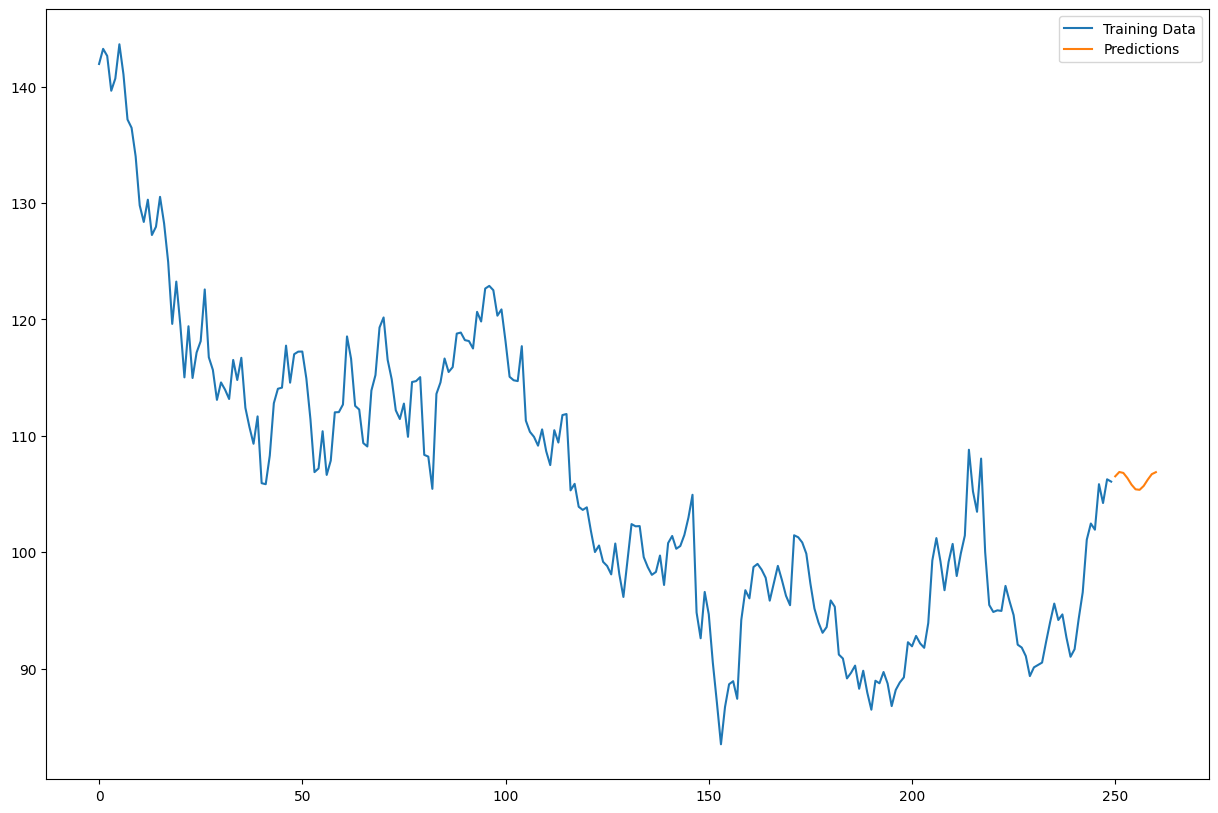

In [28]:
df["Close"].plot(legend=True, label="Training Data", figsize=(15, 10))
pred.plot(legend=True, label="Predictions")